In [96]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

from Fitter import Fitter
from Fitter import Functions
import numpy as np
import matplotlib.pyplot as plt
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
f = Fitter("linear")

1.0003217058126825 4.992553381782177


<IPython.core.display.Javascript object>


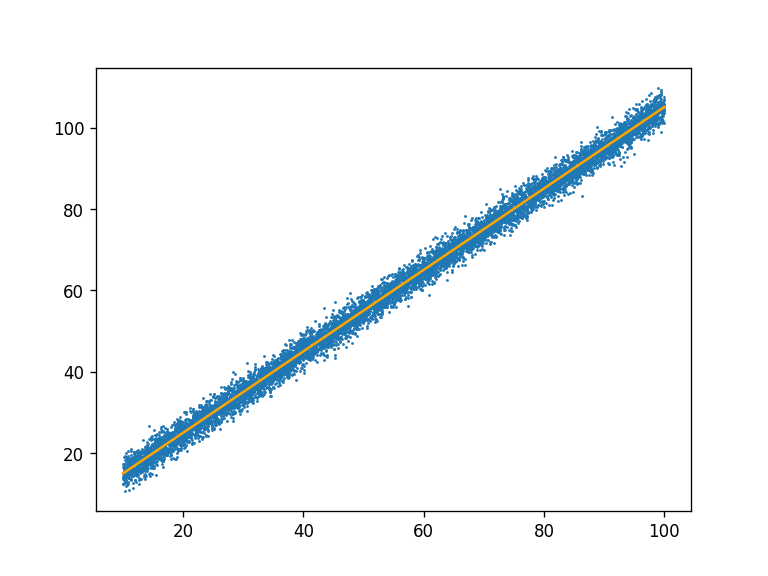

In [98]:
m, b = 1,0
xx = np.arange(10,100,0.01)
yy = xx*m+b + np.random.normal(5, 2, size = xx.shape)

f.fit(xx,yy)
p = f.getParams()
print(p.m,p.b)
fig = plt.figure()
plt.scatter(xx, yy,s=0.5)

plt.plot(xx, xx*p.m+p.b, c="orange")

<IPython.core.display.Javascript object>


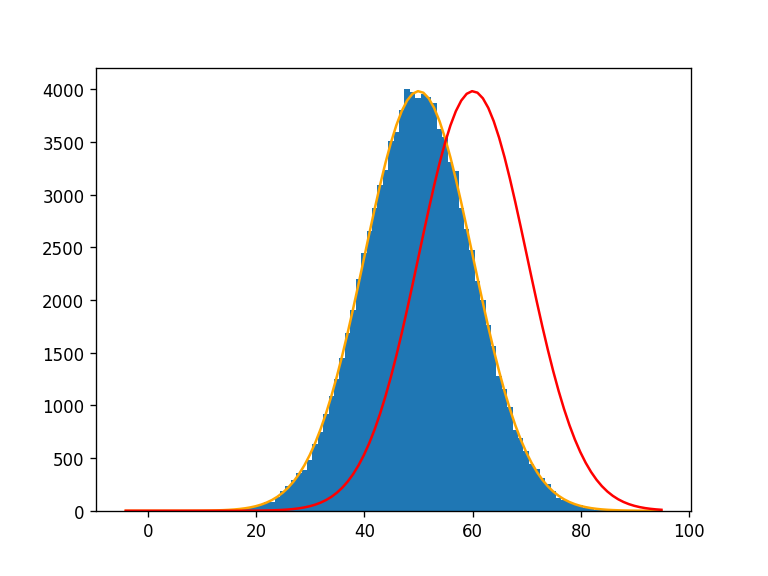

x,amp,mean,sigma
{'amp': 3984.2368765896995, 'mean': 50.01901405640684, 'sigma': 10.007424910418571}
vars: [3984.2368765896995, 50.01901405640684, 10.007424910418571], amp: 3984.2368765896995, mean: 50.01901405640684, sigma: 10.007424910418571
Mean is:  50.01901405640684
Sigma is:  10.007424910418571
Amplitude is:  3984.2368765896995
[3984.2368765896995, 50.01901405640684, 10.007424910418571]


In [105]:
f = Fitter("gaussian")

mu, sig = 50,10
yy = np.random.normal(mu, sig, size = 100000)

fig = plt.figure()
res = plt.hist(yy, bins=100)

yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5
print(f)

p0=[10,30,10]
f.fit(xx,yy,p0=p0)
p = f.getParams()
print(p)
print("Mean is: ", p.mean)
print("Sigma is: ", p.sigma)
print("Amplitude is: ", p.amp)
print(p.vars)
plt.plot(xx,f.evaluate(xx), c="orange")

plt.plot(xx,f.func(xx, p.amp, p.mean+10, p.sigma), c="red")

<IPython.core.display.Javascript object>


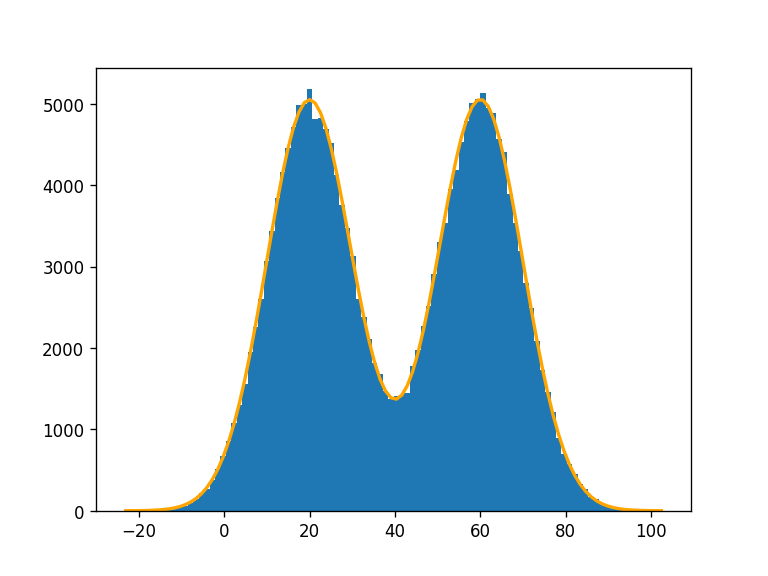

[5049.95823236   19.97518049   10.02917721 5054.68552991   59.98637495
    9.98474342]
vars: [5049.958232358858, 19.975180485567016, 10.029177213948342, 5054.685529914229, 59.98637494933283, 9.984743419290103], amp_0: 5049.958232358858, mean_0: 19.975180485567016, sigma_0: 10.029177213948342, amp_1: 5054.685529914229, mean_1: 59.98637494933283, sigma_1: 9.984743419290103


In [122]:
f = Fitter("gaussian")

mu, sig = 20,10
m2 = np.array(np.random.normal(20, 10, size = 100000))
m1 = np.array(np.random.normal(60, 10, size = 100000))
yy = np.concatenate((m2, m1))
fig = plt.figure()

res = plt.hist(yy, bins=100)
yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5

p0=[5000,30,10,1000,80,10]
f.fit(xx,yy,p0=p0)
p = f.getParams()
print(f.par)
print(p)

plt.plot(xx,f.evaluate(xx), c="orange", lw=2)

<IPython.core.display.Javascript object>


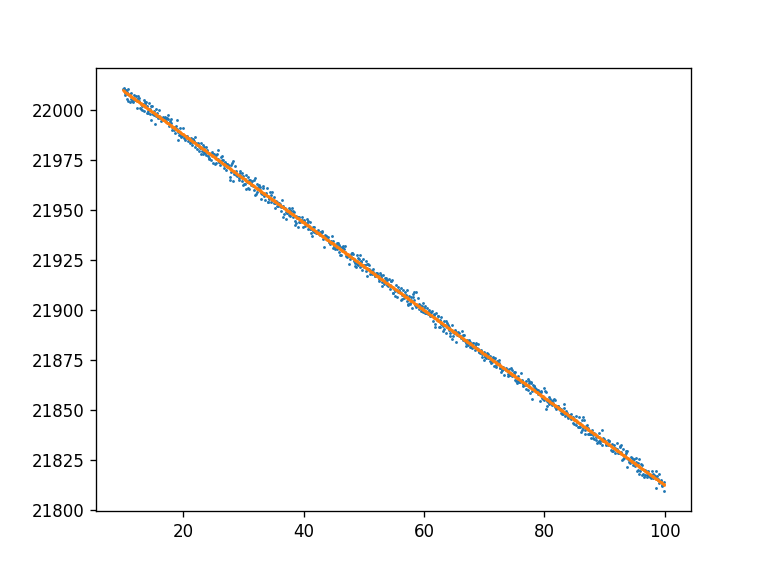

[10.00032419] [-0.00010237]
<function Functions.expo at 0x7f31cbcaa280>
[ 1.00002315e+01 -1.00069068e-04]
vars: [10.000231528405525, -0.00010006906841360828], p0: 10.000231528405525, p1: -0.00010006906841360828


In [214]:
f = Fitter("expo")
fig = plt.figure()

p0, p1 = 10, -0.0001
xx = np.arange(10,100,0.1)
yy = np.exp(p0+p1*xx)+np.random.normal(5, 2, size = xx.shape)

f.fit(xx,yy)
p = f.getParams()
print(f.par)
print(p)
plt.scatter(xx, yy,s=0.5)
plt.scatter(xx, f.evaluate(xx),s=0.5)
